In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


employee = pd.read_csv('C:\IBMEmployees-ML\Dataset\IBM-HR-Employee-Attrition-Encoded.csv')

x = employee.drop('Attrition', axis=1)
y = employee['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

<>:8: SyntaxWarning: invalid escape sequence '\I'
<>:8: SyntaxWarning: invalid escape sequence '\I'
C:\Users\deepa\AppData\Local\Temp\ipykernel_7600\2990089695.py:8: SyntaxWarning: invalid escape sequence '\I'
  employee = pd.read_csv('C:\IBMEmployees-ML\Dataset\IBM-HR-Employee-Attrition-Encoded.csv')


RandomForestClassifier(random_state=42)

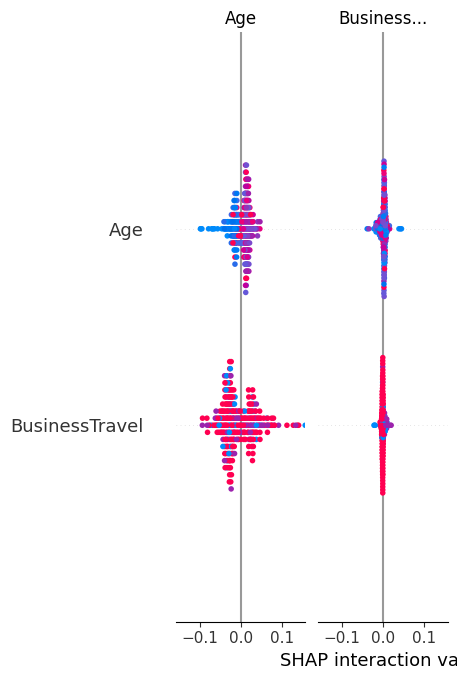

In [9]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

Permutation Importances: {'importances_mean': array([ 0.00578231, -0.00306122,  0.00272109,  0.00102041,  0.00068027,
        0.00034014, -0.00102041, -0.00034014, -0.00510204,  0.00102041,
       -0.00238095,  0.        ,  0.00068027,  0.00034014,  0.00068027,
        0.00204082, -0.00170068, -0.00136054,  0.        ,  0.00884354,
       -0.00034014, -0.00340136, -0.00034014, -0.00136054,  0.00034014,
        0.00136054,  0.        , -0.00340136, -0.00068027, -0.00238095,
       -0.0047619 ]), 'importances_std': array([0.00482226, 0.00183169, 0.00254535, 0.0015587 , 0.00451241,
       0.00238095, 0.00217793, 0.00238095, 0.00380284, 0.0015587 ,
       0.00306122, 0.00152113, 0.00136054, 0.00102041, 0.00136054,
       0.00408163, 0.00436913, 0.00346872, 0.00152113, 0.00509069,
       0.00355112, 0.        , 0.00238095, 0.00272109, 0.00282538,
       0.0031174 , 0.00215121, 0.00215121, 0.0042483 , 0.00265655,
       0.00166632]), 'importances': array([[ 0.00340136,  0.00340136,  0.010204

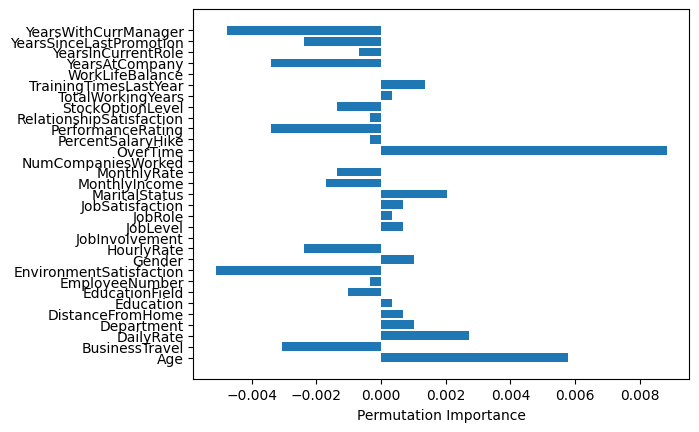

In [10]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_test, y_test, n_repeats=10)
importances = result.importances_mean
print("Permutation Importances:",result)

plt.barh(np.array(x_test.columns), importances)
plt.xlabel("Permutation Importance")
plt.show()

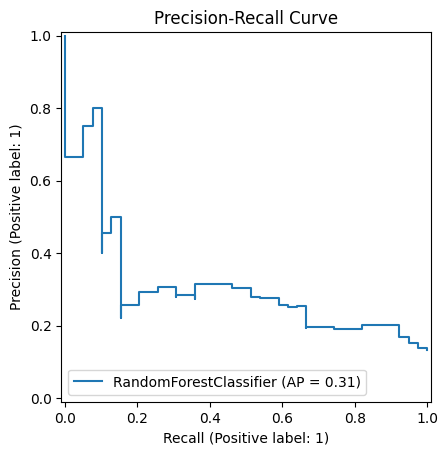

In [11]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()